<a href="https://colab.research.google.com/github/YKochura/cv-kpi/blob/5fd4822c6037b79267e80b688d5dd8e4326e304d/homeworks/lab1/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Perceptron: Forward Propagation


The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by  Frank Rosenblatt in 1958. A perceptron is a binary linear classifier. It's single-layer neural network (the single neuron).

The dataset is using for training perceptron:

- Train Dataset: $\{(\boldsymbol{X}^{(1)}, y^{(1)}), (\boldsymbol{X}^{(2)}, y^{(2)}),..., (\boldsymbol{X}^{(n)}, y^{(n)})\}$

  - where $\boldsymbol{X}^{(i)}$ &mdash; the $i$-sample. It's $m$-dimensional vector $\boldsymbol{X}^{(i)} = (x^{(i)}_1, x^{(i)}_2, ..., x^{(i)}_m)$
  - $n$ &mdash; the total number of training samples
  - $y^{(i)}$ &mdash; the ground truth label of the $i$-sample (binary target variable), $y^{(i)} \in \{0,1\}$

The appropriate weights $\boldsymbol{W}= (w_1, w_2, ..., w_m)$ are applied to the input vector $\boldsymbol{x}^{(i)} = (x^{(i)}_1, x^{(i)}_2, ..., x^{(i)}_m)$ and the resulting weighted sum including bias $b$ passed to an activation function that produces the output:

  ![]( https://docs.google.com/uc?export=download&id=13eRRx9vkmfczLaf2de2Mq_E_O1qG9Yhs)

Bias is just like an intercept added in a linear equation. It is an additional parameter in the Neural Network which is used to adjust the output along with the weighted sum of the inputs to the neuron. Moreover, bias value allows you to shift the activation function to either right or left.

# Programming Assignment

Let's consider a forward propagation of a single 2-dimensional vector:

$$X = \begin{bmatrix}
x_1  \\
x_2 
\end{bmatrix} = \begin{bmatrix}
-1  \\
2 
\end{bmatrix}$$

In [ ]:
import numpy as np  # numerical python library for calculus
import matplotlib.pyplot as plt  # library for interactive plots

In [77]:
def input_sample():
  """
  This function creates an input column vector of the shape (2, 1)
  Return:
  X -- the input column vector of the shape (2, 1)
  """

  X = np.array([[-1], [2]])
  return X

In [78]:
X = input_sample()

In [79]:
X

array([[-1],
       [ 2]])

In [62]:
X.shape

(2, 1)

A perceptron is trained using some optimization algorithm, for example **gradient descent**. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step 0:** Initialize the weight vector and bias.

**Step 1:** Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
$$z = X^T \cdot W + b$$

where $\cdot$ denotes the dot product.

**Step 2:** Apply the sigmoid activation function (see lecture), which returns binary values:

$$\widehat y = \begin{cases} 
1, \; \text{if} \, z \geq 0 \\
0, \; \text{else} 
\end{cases} $$

**Step 3:** Compute the weight updates using the optimization algorithm:

\begin{align} 
\Delta \boldsymbol{W} &= \alpha \, \boldsymbol{X}^T \cdot  \big(\boldsymbol{ \widehat y} - \boldsymbol{y} \big) \\
\Delta b &= \alpha \, \big(\boldsymbol{\widehat{y}} - \boldsymbol{y} \big)
\end{align}

here $\alpha$ is the learning rate.

**Step 4:** Update the weights and bias:

\begin{align} 
\boldsymbol{W} &= \boldsymbol{W} + \Delta \boldsymbol{W} \\
b &= b  + \Delta b
\end{align}



# **Step 0:** Initialize a weight column vector and bias 
Initialize this weight column vector and bias in the function `parameters_inititalization`:

\begin{align} 
W = \begin{bmatrix}
w_1  \\
w_2 
\end{bmatrix} &= \begin{bmatrix}
3  \\
-2 
\end{bmatrix} \\ \\
b &= 1
\end{align}


In [63]:
# Implement
def parameters_inititalization():
  """
  This function initializes a weight column vector of shape (2, 1) and bias
  Return:
  W -- weight column vector of the shape (2, 1)
  b -- bias (scalar)
  """
  W = np.array([[3],[-2]])
  b = 1 

  return W, b

In [64]:
W, b = parameters_inititalization()

In [51]:
W

array([[ 3],
       [-2]])

In [52]:
W.shape

(2, 1)

In [53]:
b

1

In [80]:
# Implement
def forwardPropagate(X, W, b):
   """
  This function computes the total weighted sum including bias and finds sigmoid activation
  value in forward propagation

  Parametes:
  X -- the input column vector of the shape (2, 1)
  W -- weight column vector of the shape (2, 1)
  b -- bias (scalar)

  Return:
  z -- the total weighted sum including bias
  g -- sigmoid activation value
   """
   x = np.multiply(X,W)
   summation = 0 
   for i in x:
     for j in i:
       summation += j 
   z = (summation + 1) 
   g = 1/(1+np.exp(-z))
   return z, g

In [81]:
z, g = forwardPropagate(X, W, b)

In [82]:
z

-6

In [83]:
g

0.0024726231566347743

# Disicion boundary 

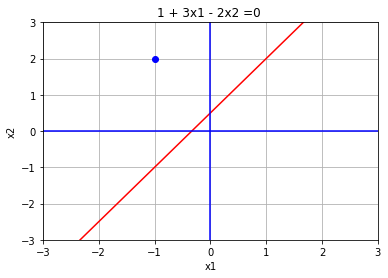

In [48]:
plt.xlim(-3, 3)
plt.ylim(-3, 3)
x1 = np.linspace(-5,5,100)
x2 = 1.5*x1 + 0.5

plt.plot(x1, x2, '-r')
plt.title('1 + 3x1 - 2x2 =0 ')
plt.xlabel('x1')  # the first feature
plt.ylabel('x2')  # the second feature

plt.plot(-1, 2, 'bo')  # X.T = [-1, 2] -- the imput sample

plt.axhline(0, color='blue')
plt.axvline(0, color='blue')
plt.grid()
plt.show()